In [4]:
import json
import pandas as pd
import seaborn as sns
import scipy.io as sio
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show, curdoc
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, TextInput
from bokeh.io import push_notebook,output_notebook
from bokeh.models import HoverTool
import MyLibrary as ml
from sklearn.model_selection import cross_val_score

In [5]:
ds=ml.dataFrame.RenameColumns(ml.pathDataSet)
ds.head(len(ds))

,Velocità,Angolo,X Sensore,Frequenza,Pressione
0,0.83,0.0,884,8.705373,136.214930
1,0.83,0.0,884,10.959415,137.277046
2,0.83,0.0,884,13.797086,136.765639
3,0.83,0.0,884,17.369503,136.208511
4,0.83,0.0,884,21.866908,133.538084
5,0.83,0.0,884,27.528806,134.703178
6,0.83,0.0,884,34.656714,135.401108
7,0.83,0.0,884,43.630218,138.327654
8,0.83,0.0,884,54.927190,140.215260
9,0.83,0.0,884,69.149235,142.239699


In [6]:
ds.describe()

,Velocità,Angolo,X Sensore,Frequenza,Pressione
count,36708.000000,36708.000000,36708.000000,36708.000000,36708.000000
mean,0.905000,3.000000,664.130435,4433.456454,141.764016
std,0.051235,2.000027,239.417093,8123.653131,7.373487
min,0.830000,0.000000,3.000000,0.000000,118.589412
25%,0.860000,1.000000,383.000000,54.927190,137.346431
50%,0.905000,3.000000,797.000000,492.787039,142.620317
75%,0.950000,5.000000,841.000000,4363.021782,147.045070
max,0.980000,6.000000,884.000000,34656.713902,170.762698


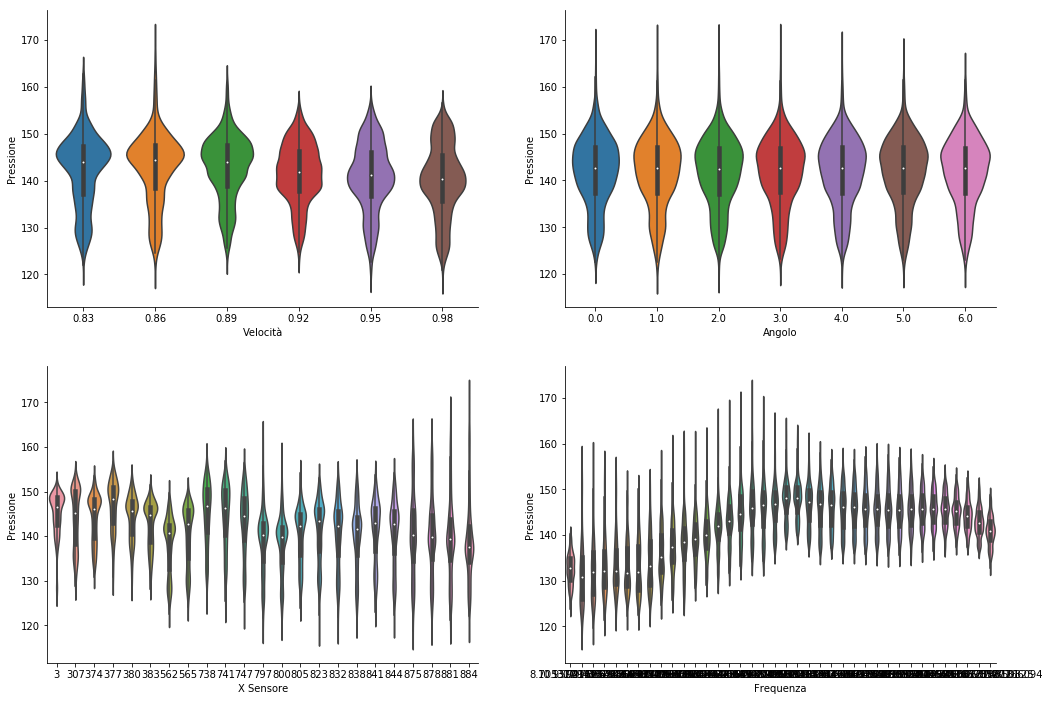

In [7]:
def plot_violin(y2, i):
    plt.subplot(2, 2, i)
    sns.violinplot(x=y2, y='Pressione', data=ds)

# Calculate the number of subplots needed
num_plots = min(len(ds.columns), 4)
f = plt.figure(figsize=(17, 12))

for i, y in enumerate(ds.columns[:num_plots], start=1):
    plot_violin(y, i)
    sns.despine()

plt.show()

In [8]:
# Predizioni del modello
filtro=(ds['X Sensore'].isin([884])) & (ds['Velocità']==0.83) & (ds['Angolo']==0.0)
ds_filtered = ds[filtro]
Input, output = ml.utils.splitInputOutput(ds, ['Pressione'])
print("input",Input)
print("output",output)

input        Velocità  Angolo  X Sensore     Frequenza
0          0.83     0.0        884      8.705373
1          0.83     0.0        884     10.959415
2          0.83     0.0        884     13.797086
3          0.83     0.0        884     17.369503
4          0.83     0.0        884     21.866908
5          0.83     0.0        884     27.528806
6          0.83     0.0        884     34.656714
7          0.83     0.0        884     43.630218
8          0.83     0.0        884     54.927190
9          0.83     0.0        884     69.149235
10         0.83     0.0        884     87.053729
11         0.83     0.0        884    109.594152
12         0.83     0.0        884    137.970863
13         0.83     0.0        884    173.695026
14         0.83     0.0        884    218.669082
15         0.83     0.0        884    275.288064
16         0.83     0.0        884    346.567139
17         0.83     0.0        884    436.302178
18         0.83     0.0        884    549.271899
19         0.8

In [9]:
# Normalizzazione dei dati
X_train, X_test, y_train, y_test = train_test_split(Input, output, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(Input)
print("X_scaled",X_scaled)

X_scaled [[0.00000000e+00 0.00000000e+00 1.00000000e+00 2.51188643e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.16227766e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.98107171e-04]
 ...
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 7.94328235e-01]
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]]


/home/ailabguest/anaconda3/envs/py36guest/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [10]:
# Creazione del modello DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
scores = cross_val_score(tree_model, X_train, y_train, cv=5)
# Addestramento del modello
tree_model.fit(X_train, y_train)

# Valutazione del modello
score = tree_model.score(X_test, y_test)
print("Accuracy:", score)
mean_score = np.mean(scores)
print("Mean cross-validation score:", mean_score)

Accuracy: 0.9891018274569788
Mean cross-validation score: 0.9833350966320455


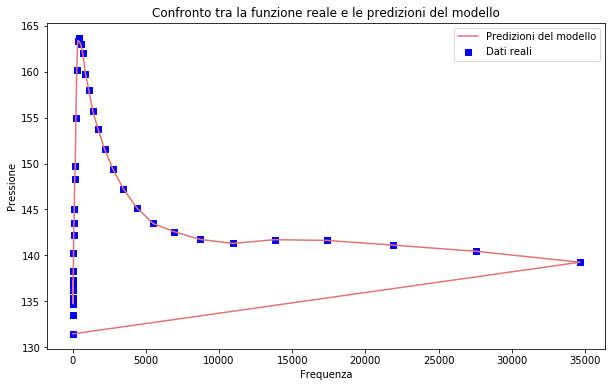

In [11]:
Input2 = ds_filtered.iloc[:, 0:4].values
Output = ds_filtered.iloc[:, 4:5].values
predictions_tree = tree_model.predict(Input2)
# Plottaggio dei risultati
plt.figure(figsize=(10, 6))
plt.scatter(ds_filtered['Frequenza'], Output, color='blue', label='Dati reali',marker='s')
color = (224/255, 117/255, 118/255)
plt.plot(ds_filtered['Frequenza'], predictions_tree, color=color, label='Predizioni del modello')
#plt.plot(X_real, y_real, color='green', label='Funzione reale')

plt.xlabel('Frequenza')
plt.ylabel('Pressione')
plt.title('Confronto tra la funzione reale e le predizioni del modello')
#plt.title('Accuracy: {:.2f}'.format(score))
plt.legend()
plt.show()

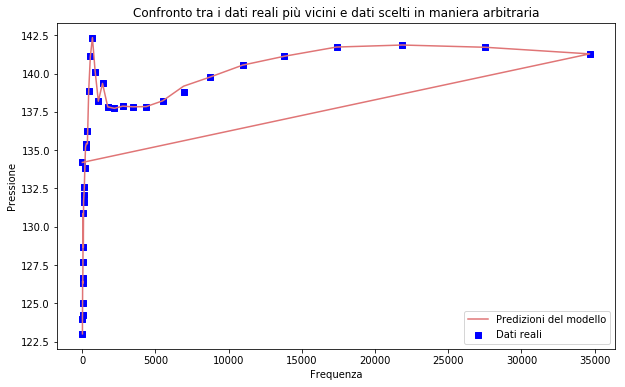

In [12]:
def searchMinDistanzie(nomeDelSet,valore):
    indiceMinore=(np.abs(ds[nomeDelSet]-valore)).idxmin()
    valoreMinore=ds[nomeDelSet][indiceMinore]
    return valoreMinore
vi=2.2
ai=6
si=800
# Ottieni le caratteristiche dalla colonna 0 di ds_filtered
def new_filtro(vi,ai,si):
    v=searchMinDistanzie('Velocità',vi)
    a=searchMinDistanzie('Angolo',ai)
    s=searchMinDistanzie('X Sensore',si)
    filtro = (ds['X Sensore'] == s) & (ds['Velocità'] == v) & (ds['Angolo'] == a)
    return filtro
def dataFrameCustom(vi,ai,si,fi):
    l=len(fi)
    data = {'velocità':np.full(l,vi),'angolo':np.full(l,ai),'X sensore':np.full(l,si),'Frequenza': fi}
    ls=pd.DataFrame(data)
    return ls
f=new_filtro(vi,ai,si)
ds_filtered = ds[f]
feature_4 = ds_filtered.iloc[:, 3].values
ls=dataFrameCustom(vi,ai,si,feature_4)
predictions_tree = tree_model.predict(ls.iloc[:, 0:4].values)
feature_5 = ds_filtered.iloc[:, 4].values
plt.figure(figsize=(10, 6))
plt.scatter(feature_4, feature_5, color='blue', label='Dati reali',marker='s')
plt.plot(feature_4, predictions_tree, color=color, label='Predizioni del modello')
plt.xlabel('Frequenza')
plt.ylabel('Pressione')
plt.title('Confronto tra i dati reali più vicini e dati scelti in maniera arbitraria')
plt.legend()

In [13]:
source=ColumnDataSource(data=dict(x=ds_filtered['Frequenza'],y=ds_filtered['Pressione'],y2=predictions_tree))
pi=figure(title='Plot interattivo',width=850, height=800,toolbar_location='below')
pi.scatter('x','y',source=source,line_width=2,line_color='blue',legend_label='Dati reali')
pi.line('x','y2',source=source,line_width=2,line_color='red',legend_label='Predizioni del modello')
# Text input combinato
input_text_combined = TextInput(value='884 0.83 0.0', title='Inserisci la Velocità, l\'Angolo e la X Sensore')
# Aggiunta di uno strumento di hover
hover = HoverTool(tooltips=[("Coordinate", "($x, $y)")])
pi.add_tools(hover)
def update(attr, old, new):
    pi.title.text = new
    values = new.split()
    if len(values) == 3:
        speed, angle, sensor_x = map(float, values)
        filtro = new_filtro(speed, angle, int(sensor_x))
        ds_filtered = ds[filtro]
        
        # Ottieni le caratteristiche dalla colonna 0 di ds_filtered
        feature_4 = ds_filtered.iloc[:, 3].astype(float).values
        Input2 = dataFrameCustom(speed, angle, int(sensor_x), feature_4)
        
        predictions_tree = tree_model.predict(Input2)
        source.data = dict(x=ds_filtered['Frequenza'], y=ds_filtered['Pressione'], y2=predictions_tree)
        push_notebook()
input_text_combined.on_change('value', update)

# Layout
layout = column(input_text_combined, pi)

# Visualizza il layout nel notebook
curdoc().add_root(layout)

# Visualizza il plot nel browser
output_notebook()
output_file("plot_interattivo_con_input_numerico.html")
show(layout)

AttributeError: unexpected attribute 'legend_label' to Circle, possible attributes are angle, angle_units, fill_alpha, fill_color, js_event_callbacks, js_property_callbacks, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, name, radius, radius_dimension, radius_units, size, subscribed_events, tags, x or y